## Question 1


In [16]:
using PyPlot,JuMP, Mosek
X = 4 + randn(2, 50)
t = linspace(0,2pi,100)
x1 = 4; x2 = 4

m = Model(solver=MosekSolver(LOG=0))
@variable(m, radius >= 0) # define a variable that holds the radius

# for our constraint, we ensure that the distance between the center and each 
# point is less than radius of the circle
@constraint(m, constr[i in 1:50], norm(X[:,i] - [x1,x2]) <= radius)

# in our objective, we must minimize the radius
@objective(m, Min, radius)

solve(m)

println("The optimal radius is = ", getobjectivevalue(m))

The optimal radius is = 2.8819134387327643


Plot the new circle with the optimal radius and points

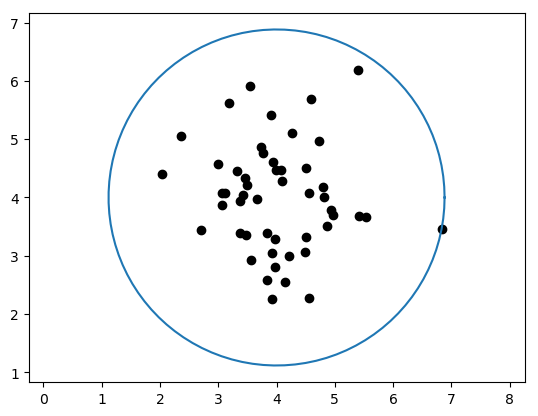

(0.8314186847292768, 7.170032236542455, 0.830294245857006, 7.169705754142994)

In [17]:
plot(4 + getobjectivevalue(m)*cos.(t), 4 + getobjectivevalue(m)*sin.(t))
scatter(X[1,:], X[2,:], color = "black")
axis("equal")

## Question 2

##### Part (a)

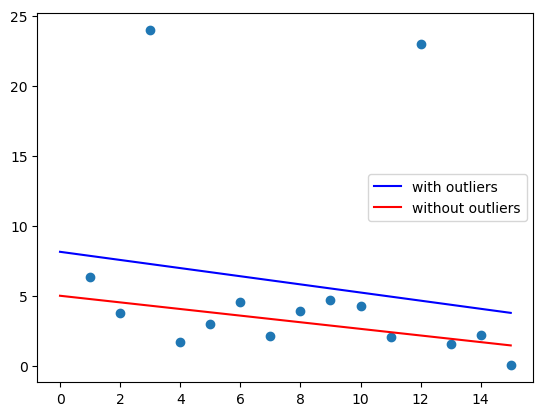

Academic license - for non-commercial use only
Academic license - for non-commercial use only


PyObject <matplotlib.legend.Legend object at 0x7f054b1dd7d0>

In [72]:
x = 1:15
y = [6.31, 3.78, 24, 1.71, 2.99, 4.53, 2.11, 3.88, 4.67, 4.25, 2.06, 23, 1.58, 2.17,0.02]
scatter(x,y)


using JuMP, Gurobi, PyPlot


#################### PLOT WITH OUTLIERS ##########################
# order of polynomial to use
k = 1

# fit using a function of the form f(x) = u1 x^k + u2 x^(k-1) + ... + uk x + u{k+1}
n = length(x)
A = zeros(n,k+1)
for i = 1:n
    for j = 1:k+1
        A[i,j] = x[i]^(k+1-j)
    end
end

m = Model(solver=GurobiSolver(OutputFlag=0))

@variable(m, u[1:k+1])
@objective(m, Min, sum( (y - A*u).^2 ) )

status = solve(m)
uopt = getvalue(u)

npts = 100
xfine_wo = linspace(0,15,npts)
ffine_wo = ones(npts)
for j = 1:k
    ffine_wo = [ffine_wo.*xfine_wo ones(npts)]
end
yfine_wo = ffine_wo * uopt
plot( xfine_wo, yfine_wo, "b-")

####################################################################


##################### PLOT WITHOUT OUTLIERS  #######################
A = A[ 1:size(A,1) .!= 3,:]
A = A[ 1:size(A,1) .!= 11,:]
splice!(y,3)
splice!(y,11)
m = Model(solver=GurobiSolver(OutputFlag=0))
@variable(m, u[1:k+1])
@objective(m, Min, sum( (y - A*u).^2 ) )

status = solve(m)
uopt = getvalue(u)
npts = 100
xfine_wo = linspace(0,15,npts)
ffine_wo = ones(npts)
for j = 1:k
    ffine_wo = [ffine_wo.*xfine_wo ones(npts)]
end
yfine_wo = ffine_wo * uopt
plot( xfine_wo, yfine_wo, "r-")
legend(["with outliers", "without outliers"], loc = "best")
#plot( x, y, "r.", markersize=10)

###################################################################

##### Part (b)

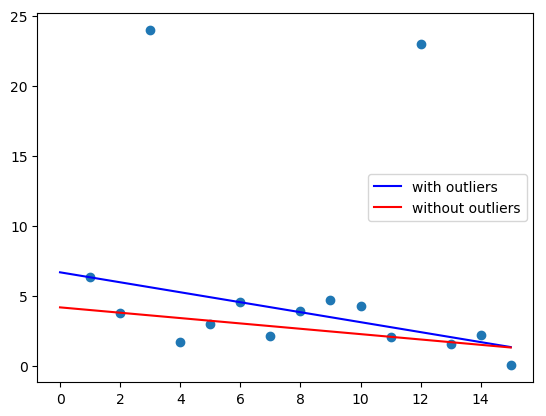

Academic license - for non-commercial use only
Academic license - for non-commercial use only


PyObject <matplotlib.legend.Legend object at 0x7f054af3ef10>

In [86]:
x = 1:15
y = [6.31, 3.78, 24, 1.71, 2.99, 4.53, 2.11, 3.88, 4.67, 4.25, 2.06, 23, 1.58, 2.17,0.02]
scatter(x,y)


using JuMP, Gurobi, PyPlot


#################### PLOT WITH OUTLIERS ##########################
# order of polynomial to use
k = 1

# fit using a function of the form f(x) = u1 x^k + u2 x^(k-1) + ... + uk x + u{k+1}
n = length(x)
A = zeros(n,k+1)
for i = 1:n
    for j = 1:k+1
        A[i,j] = x[i]^(k+1-j)
    end
end

m = Model(solver=GurobiSolver(OutputFlag=0))

@variable(m, u[1:k+1])
@variable(m, t[1:15])
@constraint(m, y - A*u .<= t)
@constraint(m, -t .<= y - A*u)
@objective(m, Min, sum(t))
status = solve(m)
uopt = getvalue(u)

npts = 100
xfine_wo = linspace(0,15,npts)
ffine_wo = ones(npts)
for j = 1:k
    ffine_wo = [ffine_wo.*xfine_wo ones(npts)]
end
yfine_wo = ffine_wo * uopt
plot( xfine_wo, yfine_wo, "b-")

####################################################################


################ PLOT WITHOUT OUTLIERS ############################


A = A[ 1:size(A,1) .!= 3,:]
A = A[ 1:size(A,1) .!= 11,:]
splice!(y,3)
splice!(y,11)
m = Model(solver=GurobiSolver(OutputFlag=0))

@variable(m, u[1:k+1])
@variable(m, t[1:13])
@constraint(m, y - A*u .<= t)
@constraint(m, -t .<= y - A*u)
@objective(m, Min, sum(t)) 



status = solve(m)
uopt = getvalue(u)
npts = 100
xfine_wo = linspace(0,15,npts)
ffine_wo = ones(npts)
for j = 1:k
    ffine_wo = [ffine_wo.*xfine_wo ones(npts)]
end
yfine_wo = ffine_wo * uopt
plot( xfine_wo, yfine_wo, "r-")
legend(["with outliers", "without outliers"], loc = "best")
#plot( x, y, "r.", markersize=10)

###################################################################

##### Part (c)

First, we plot the huber loss function for -3 <= x <= 3

In [115]:
using JuMP, Gurobi

x = collect(linspace(-3,3,100))
M = 1

y_vals = []
env = Gurobi.Env()

for i in 1:length(x)
    m = Model(solver=GurobiSolver(env,OutputFlag=0))
    @variable(m, w <= M)
    @variable(m, v >= 0)
    @constraint(m, abs(x[i]) <= w + v)
    @objective(m, Min, w^2 + 2*M*v)
    status = solve(m)
    push!(y_vals, getobjectivevalue(m))
end


Academic license - for non-commercial use only


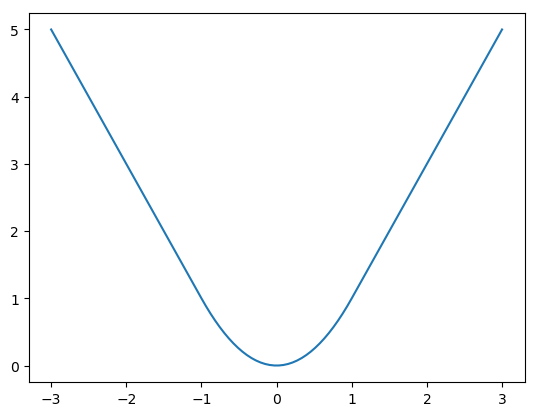

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f0551699450>

In [116]:
plot(x, y_vals)

Here, we plot the huber loss function the data 

In [121]:
x = 1:15
y = [6.31, 3.78, 24, 1.71, 2.99, 4.53, 2.11, 3.88, 4.67, 4.25, 2.06, 23, 1.58, 2.17,0.02]
M=1

using JuMP, Gurobi, PyPlot


# order of polynomial to use
k = 1

# fit using a function of the form f(x) = u1 x^k + u2 x^(k-1) + ... + uk x + u{k+1}
n = length(x)
A = zeros(n,k+1)
for i = 1:n
    for j = 1:k+1
        A[i,j] = x[i]^(k+1-j)
    end
end

m = Model(solver=GurobiSolver(OutputFlag=0))

@variable(m, u[1:k+1])
@variable(m, t[1:15])
@variable(m, w[1:15] <= M)
@variable(m, v[1:15] >= 0)

@constraint(m, y - A*u .<= t) # absolute value trick
@constraint(m, -t .<= y - A*u)
@constraint(m, t .<= w + v) 


@objective(m, Min, sum( w[i]^2 + 2*M*v[i] for i in 1:15 ))

status = solve(m)

Academic license - for non-commercial use only


:Optimal

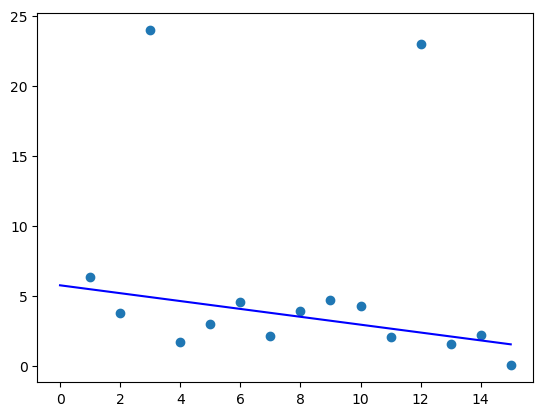

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f054b100810>

In [122]:
uopt = getvalue(u)

scatter(x,y)
npts = 100
xfine_wo = linspace(0,15,npts)
ffine_wo = ones(npts)
for j = 1:k
    ffine_wo = [ffine_wo.*xfine_wo ones(npts)]
end
yfine_wo = ffine_wo * uopt
plot( xfine_wo, yfine_wo, "b-")

## Question 3

##### Part (a)

First, we convert the given model into a geometric model. Which is given as follows

$$  
Min  \qquad   \alpha_4^{-1} T^{-1} r^{-2}
$$
given

$$
     \dfrac{\alpha_1 T r w^{-1}}{C_{max}} + \dfrac{\alpha_2 r}{C_{max}} + \dfrac{\alpha_3 r w}{C_{max}} \leqslant 1
$$

$$ 
    \dfrac{w}{0.1r} \leqslant 1
$$

$$ 
    w_{min}w^{-1} \leqslant 1
$$

$$ 
    ww_{max}^{-1} \leqslant 1
$$

$$ 
    r_{min}r^{-1} \leqslant 1
$$

$$ 
    rr_{max}^{-1} \leqslant 1
$$

$$
    T_{min}T^{-1} \leqslant 1
$$

$$
    TT_{max}^{-1} \leqslant 1
$$

Now that we have a geometric model, we can convert this into a convex model.

Let 
$$
x = log(T) \\
y = log(w) \\
z = log(r) \\
$$

We can change the above geometric model into a log-sum-exp as follows:

$$
Min \qquad log(e^{- log(\alpha_4) - y - 2z})
$$

Given

$$
log(e^{log(\alpha_1/C_{max}) + x + z - y} + e^{log(\alpha_2/C_{max}) + z} + e^{log(\alpha_3/C_{max}) + z + y}) \leqslant 0
$$

$$
log(e^{log(10) + y - z}) \leqslant 0
$$

$$
log(e^{log(w_{min}) - y}) \leqslant 0
$$

$$
log(e^{y - log(w_{max})}) \leqslant 0
$$

$$
log(e^{log(r_{min}) - z}) \leqslant 0
$$

$$
log(e^{z - log(r_{max})}) \leqslant 0 
$$

$$
log(e^{log(T_{min}) - x}) \leqslant 0
$$

$$
log(e^{x - log(T_{max})}) \leqslant 0
$$

The above constraints can further be simplified as follows


$$
log(e^{log(\alpha_1/C_{max}) + x + z - y} + e^{log(\alpha_2/C_{max}) + z} + e^{log(\alpha_3/C_{max}) + z + y}) \leqslant 0
$$

$$
 y - z \leqslant -log(10)
$$

$$
    log(W_{min}) \leqslant y \leqslant log(W_{max})
$$

$$
    log(r_{min}) \leqslant z \leqslant log(r_{max})
$$

$$ 
    log(T_{min}) \leqslant x \leqslant log(T_{max})
$$


##### Part (b)

In [169]:
using JuMP, Mosek

m = Model(solver=MosekSolver(LOG=0))
@variable(m, x)
@variable(m, y)
@variable(m, z)
@NLconstraint(m, log(exp(log(1/500) + x + z - y) + exp(log(1/500) + z) + exp(log(1/500) + z + y)) <= 0)
@NLconstraint(m, y - z <= -log(10))
@objective(m, Min, - y - 2z)
status = solve(m)



:Optimal

Inf